In [1]:
# IMPORT LIABRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
#IMPORT DATASET

In [4]:
data = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/5. multi linear regression/ToyotaCorolla.csv",encoding = "ISO-8859-1")
# utf-8 codec cant decode solution: encoding = "ISO-8859-1"

In [5]:
# APPLY BASIC FUNCTIONS TO CHECK DATASET

In [6]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
data.shape

(1436, 38)

In [8]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [9]:
# given= Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
toyota = data.drop(['Id', 'Model','Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic','Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar' ],axis=1)

In [10]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [13]:
# correlation matrix
# here we can check highest correlated variable, if +ve& near 1 value:its shows that how much variable"usefull"to predict 
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


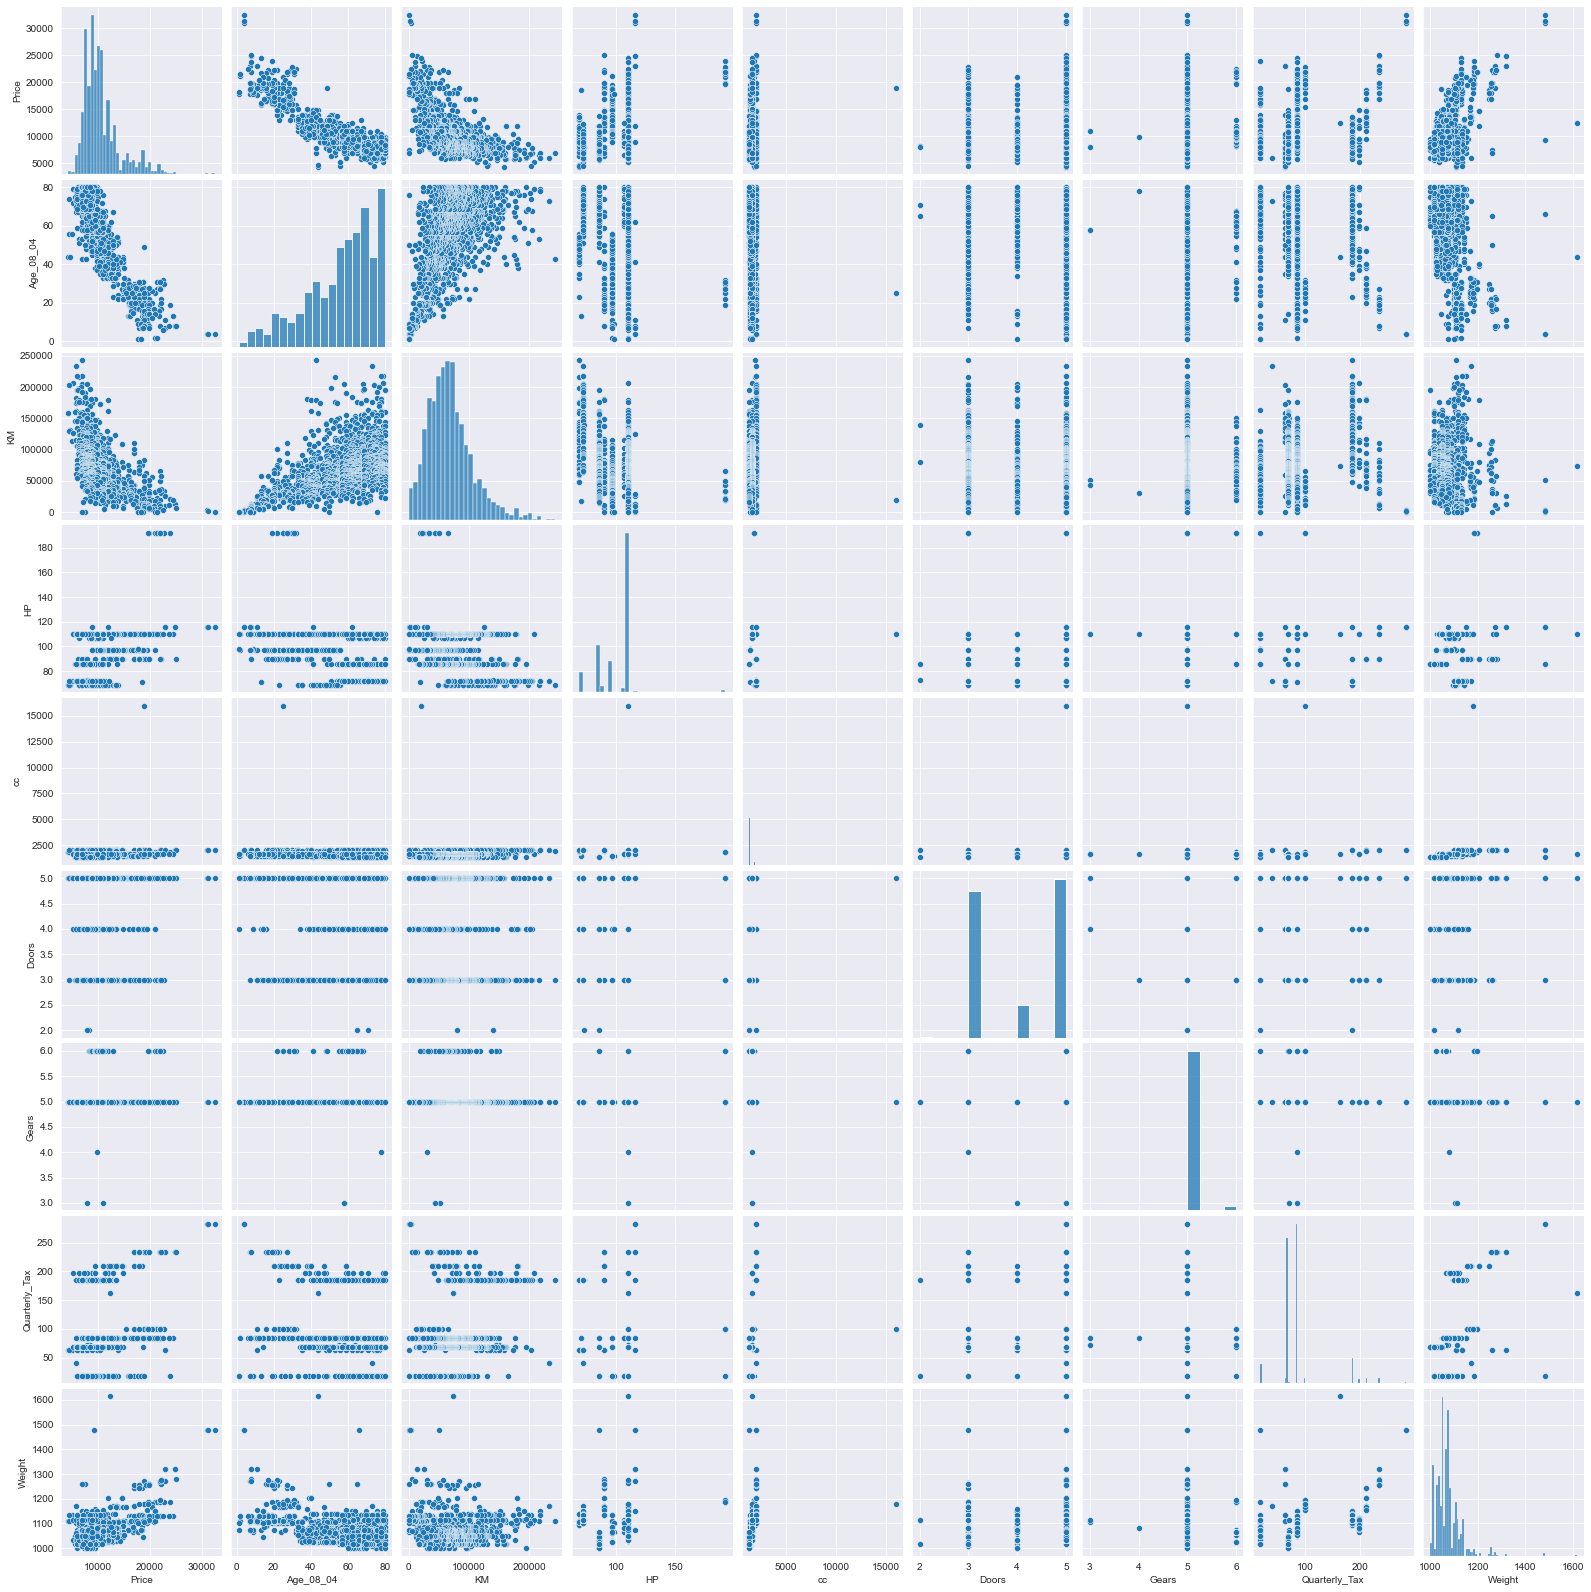

In [14]:
# to visualise above correlation matrix we can use scatter plot  betweenvariable alongwith histogram
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

In [15]:
# PREPARING MODEL..................................................................................

In [16]:
#build model, by using ols=ordinary least square methode used
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:50:09   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# here we get to know p value is more than 0.05of cc,doors

In [18]:
#coeffitiants
model.params
# y=b0+b1(x1)+b2(x2)+b3(x4)+b4(x5)...

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [19]:
#T VALUE, P VALUE

In [20]:
# t and p values : tvalues as such not important
print(model.tvalues, '/n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 /n Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [21]:
# here p value of cc = 1.790902e-01 , Doors = 9.677716e-01 which is >0.05
# above p values which <0.05=significant,>0.05=insignificant, so "cc,doors" both are insignificant
# insignificant= multicolinearity ; isuue

In [22]:
# R^2 VALUE

In [23]:
print(model.rsquared,model.rsquared_adj)

0.8637627463428192 0.8629989775766963


In [24]:
# by R^2 VALUE WE CAN DECIDE THE MODEL IS TO BE GOOD OR BAD
# wheather variable adding value to regression equation = yes/no 
#for good model: r^2 value can be slightly increased but adj r^2 would be decreased so we can conclude importance of variable 

In [25]:
# simple regression models...........................................................................................
# TO FIND OUT MULTICOLINEARITY PROBLRM

In [26]:
ml_cc= smf.ols('Price~cc',data=toyota).fit()
# tvalue,pvalue
(ml_cc.tvalues,ml_cc.pvalues)

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [27]:
ml_Doors = smf.ols('Price~Doors',data=toyota).fit()
# tvalue,pvalue
(ml_Doors.tvalues,ml_Doors.pvalues)

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [28]:
ml_CD= smf.ols('Price~cc+Doors',data=toyota).fit()
# tvalue,pvalue
(ml_CD.tvalues,ml_CD.pvalues)

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

In [29]:
# here we found that by using simple lineare regression pvalues becomes significant

In [30]:
# CALCULATING VIF

In [31]:
# Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# The VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.
# In the simplest case, two variables will be highly correlated, and each will have the same high VIF.
# vif >20 colinearity problem

In [32]:
rsq_Age_08_04 = smf.ols('Age_08_04~+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
      'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [33]:
# here also cc,doors same vif, so we get to now wich variable to be drop

In [34]:
# RESIDUAL ANALYSIS
# VALIDATION TECHNIQUE:
# 1. Q-Q PLOT, 2.RESIDUAL FOR HOMOSCADESTICITY 3.RESIDUAL*REGRESSER

In [35]:
# 1. Q-Q PLOT

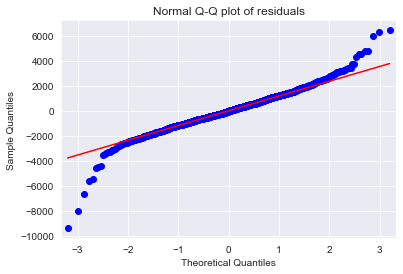

In [36]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [37]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [38]:
# 2.RESIDUAL FOR HOMOSCADESTICITY
# A residual is the vertical distance between a data point and the regression line. ... In other words, the residual is the error that isn't explained by the regression line. The residual(e) can also be expressed with an equation. The e is the difference between the predicted value (ŷ) and the observed value.

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

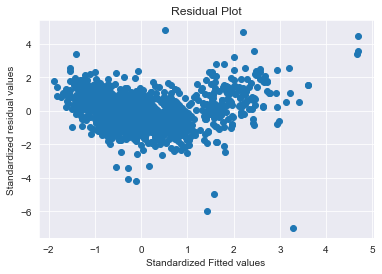

In [40]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [41]:
# if there is any kind of shape then there is problem, noshape+no problem

In [42]:
#3.RESIDUAL*REGRESSER

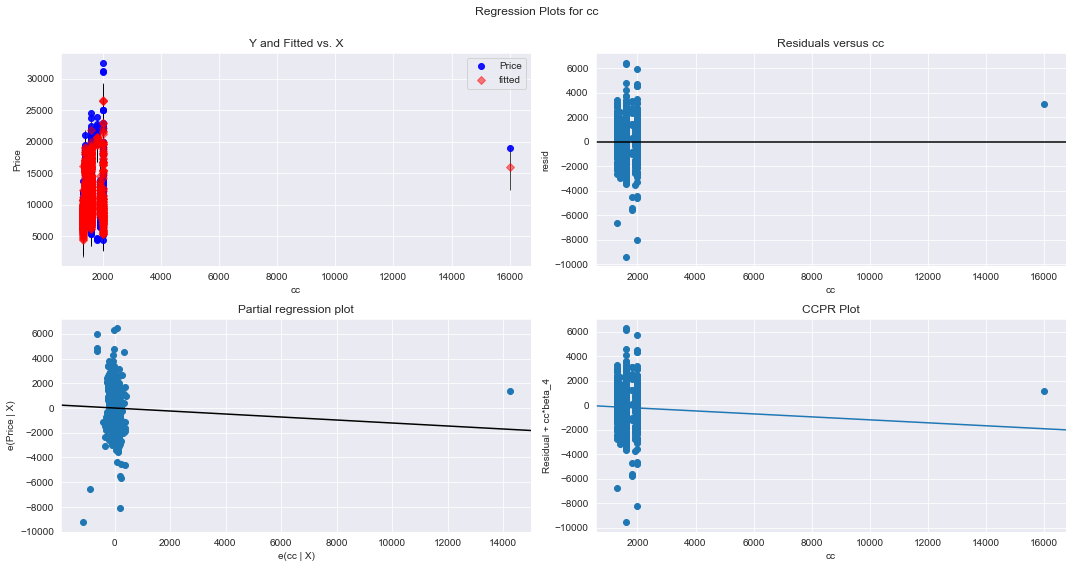

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

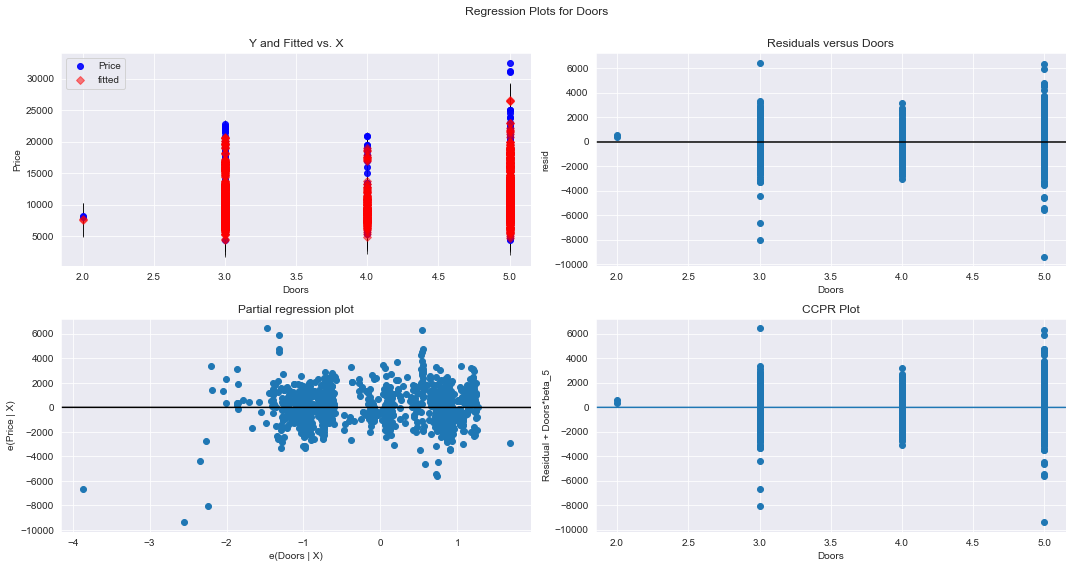

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

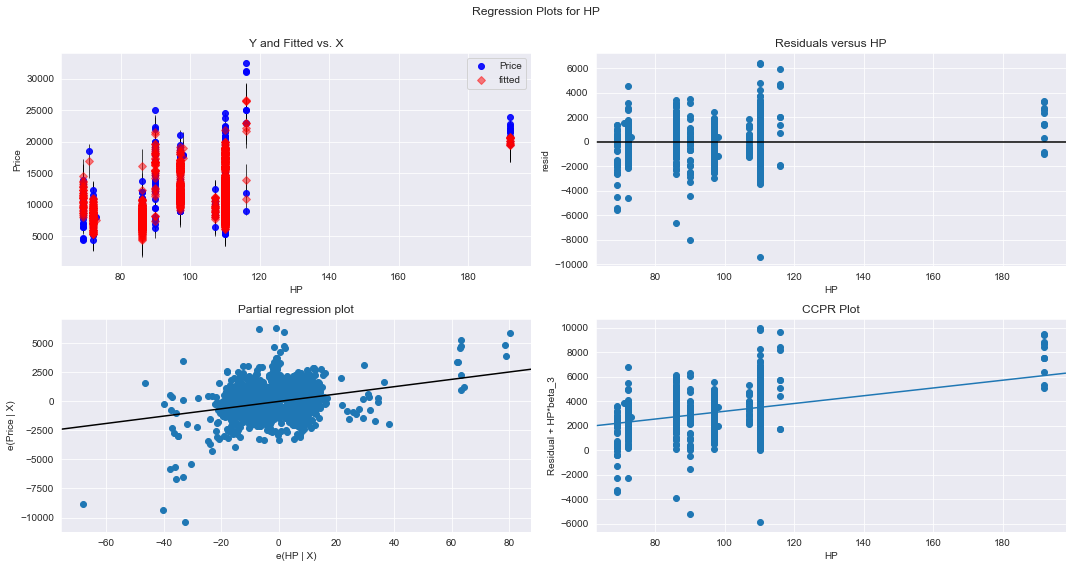

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [46]:
#MODEL DELITION DIAGNOSTIC...................................................
#DECTING INFLUENCER/OUTLIER
#1.COOKS DISTANCE 2.HIGH INFLUENCE POINTS

In [47]:
# COOK'S DISTANCE............................................................

In [48]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

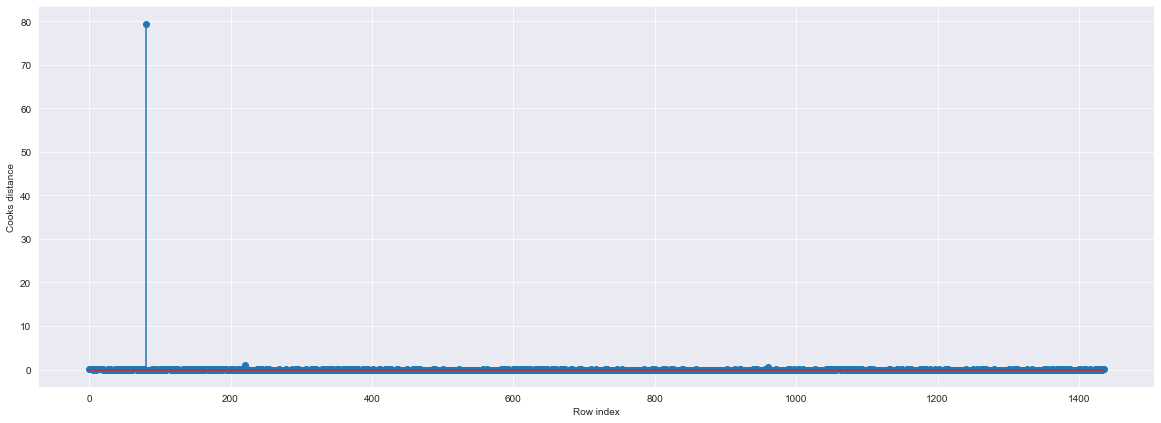

In [49]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [50]:
#index and value of influencer where c 
(np.argmax(c),np.max(c))

(80, 79.52010624135295)

In [51]:
#HIGH INFLUENCE POINTS

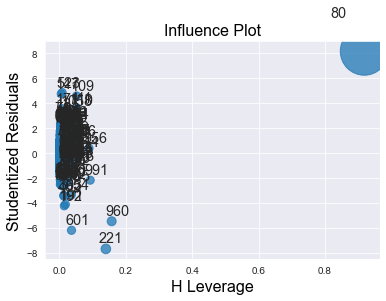

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [53]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [54]:
leverage_cutoff
# MEANS >0.02 ARE THE INFLUENCE POINTS IN GRAPH

0.020891364902506964

In [55]:
# IMPROVE MODEL

In [56]:
#from above dia 80,79 are influencing points

In [57]:
toyota[toyota.index.isin([80, 79.52010624135295])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180


In [58]:
#See the differences in HP and other variable values, COMPARE [80]&[79]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [59]:
# IMPROVING MODEL.................................................................

In [60]:
data2 = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/5. multi linear regression/ToyotaCorolla.csv",encoding = "ISO-8859-1")
# utf-8 codec cant decode solution: encoding = "ISO-8859-1"

In [61]:
# given= Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
data3 = data2.drop(['Id', 'Model','Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic','Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar' ],axis=1)

In [62]:
data3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [63]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data4 = data3.drop(data3.index[[80,79]],axis=0).reset_index()

In [64]:
data4

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,1300,3,5,69,1025
1430,1432,10845,72,19000,86,1300,3,5,69,1015
1431,1433,8500,71,17016,86,1300,3,5,69,1015
1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [65]:
#Drop the original index
data5=data4.drop(['index'],axis=1)

In [66]:
data5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [67]:
# BUILD MODEL.............................................................................

In [68]:
#Exclude variable "cc" and generate R-Squared and AIC values for new data4
final_ml_Doors= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = data5).fit()

In [69]:
(final_ml_Doors.rsquared,final_ml_Doors.aic)

(0.863078465721289, 24735.31262568683)

In [70]:
#Exclude variable "Doors" and generate R-Squared and AIC values for new data4
final_ml_cc= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data5).fit()

In [71]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.8692433800620685, 24669.247833994683)

In [72]:
# Comparing above R-Square and AIC values, model 'final_ml_cc' has high R- square and low AIC value hence include variable 'cc' so that multi collinearity problem would be resolved.

In [73]:
# for "final_ml_cc" model we repetativly follw below steps to increase r^2 value.
#1.cooks distance 2.influenced points 3.drop that point in dataset 4.new record.......... repeat process

In [74]:
#BUILD MODEL 1

In [75]:
# COOK'S DISTANCE..........................................

In [76]:
final_ml_cc1= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data5).fit()

In [77]:
model_influence_cc1 = final_ml_cc1.get_influence()
(c_cc1, _) = model_influence_cc1.cooks_distance

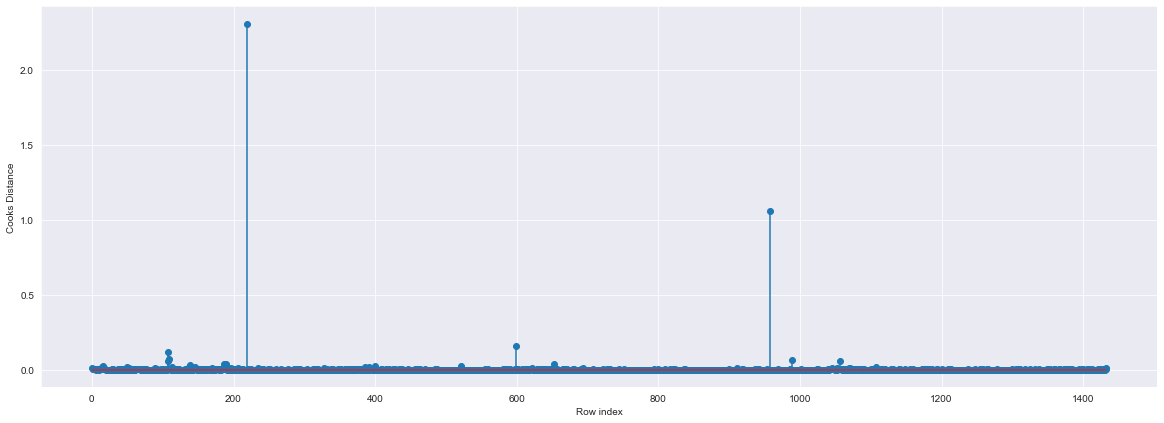

In [78]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)),np.round(c_cc1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [79]:
#index of the data points where c is more than .5
(np.argmax(c_cc1),np.max(c_cc1))

(219, 2.3090184331684913)

In [80]:
#Drop 219
data6=data5.drop(data4.index[[219]],axis=0)

In [81]:
#Reset the index and re arrange the row values
data7=data6.reset_index()

In [82]:
data8=data7.drop(['index'],axis=1)

In [83]:
data8

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [84]:
final_ml_cc1= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data8).fit()

In [85]:
(final_ml_cc1.rsquared,final_ml_cc1.aic)

(0.8775239071885872, 24559.07815985765)

In [86]:
# build model 2

In [87]:
#Build the model on the new data
final_ml_cc2= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data8).fit()

In [88]:
#Again check for influencers
model_influence_cc2 = final_ml_cc2.get_influence()
(c_cc2, _) = model_influence_cc2.cooks_distance

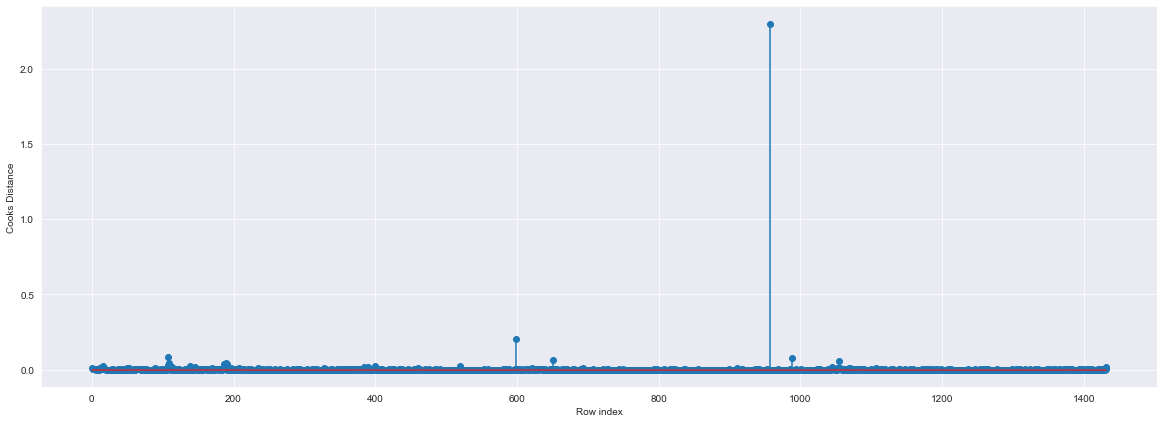

In [89]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data8)),np.round(c_cc2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [90]:
#index of the data points where c is more than .5
(np.argmax(c_cc2),np.max(c_cc2))

(957, 2.299354457845675)

In [91]:
#Drop 76 and 77 observations
data9=data8.drop(data8.index[[957]],axis=0)

In [92]:
#Reset the index and re arrange the row values
data10=data9.reset_index()

In [93]:
data11=data10.drop(['index'],axis=1)

In [94]:
data11

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [95]:
#Build the model on the new data
final_ml_cc2= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data11).fit()

In [96]:
(final_ml_cc2.rsquared,final_ml_cc2.aic)

(0.8842788862460086, 24461.574344123175)

In [97]:
# build model 3

In [98]:
final_ml_cc3= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data11).fit()

In [99]:
#Again check for influencers
model_influence_cc3 = final_ml_cc3.get_influence()
(c_cc3, _) = model_influence_cc3.cooks_distance

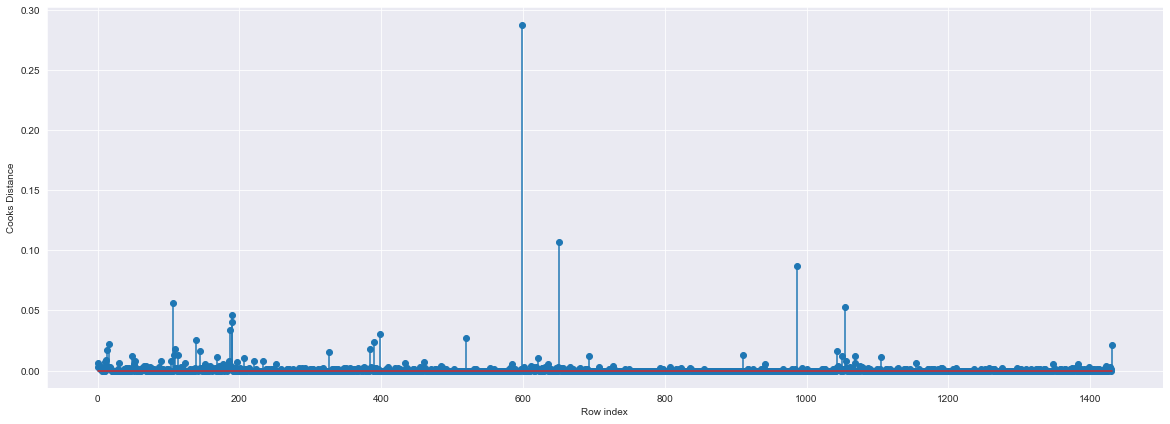

In [100]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data11)),np.round(c_cc3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [101]:
(np.argmax(c_cc3),np.max(c_cc3))

(598, 0.28815212433003196)

In [102]:
#Drop 76 and 77 observations
data12=data11.drop(data11.index[[598]],axis=0)

In [103]:
#Reset the index and re arrange the row values
data13=data12.reset_index()

In [104]:
data14=data13.drop(['index'],axis=1)

In [105]:
#Build the model on the new data
final_ml_cc3= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data14).fit()

In [106]:
(final_ml_cc3.rsquared,final_ml_cc3.aic)

(0.888199579209342, 24395.38822212086)

In [109]:
from sklearn.model_selection import train_test_split
train_data,test_Data= train_test_split(toyota,test_size=0.3)

finalmodel1 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data14).fit()
finalmodel1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:54:48   Log-Likelihood:                -12190.
No. Observations:                1431   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.444e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.586e+04   1424.163    -11.135      0.000   -1.87e+04   -1.31e+04
Age_08_04      -110.8670      2.452    -45.207      0.000    -115.678    -106.056
KM               -0.0179      0.001    -15.131      0.000      -0.020      -0.016
HP               33.5833      2.721     12.344      0.000      28.246      38.920
cc               -3.5509      0.296    -11.989      0.000      -4.132      -2.970
Gears           601.8076    175.181      3.435      0.001     258.166     945.449
Quarterly_Tax     4.1127      1.364      3.016      0.003       1.437       6.788
Weight           30.6024      1.220     25.079      0.000      28.209      32.996
==============================================================================
Omnibus:                       68.917   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.722
Skew:                           0.114   Prob(JB):                     3.20e-48
Kurtosis:                       4.902   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# prediction
finalmodel_pred = finalmodel1.predict(train_data)

In [111]:
#train residuals
finalmodel_res = train_data["Price"]-finalmodel_pred

In [112]:
##train rmse
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))

In [117]:
finalmodel_rmse

1339.1116049492252

In [113]:
## test prediction
finalmodel_testpred = finalmodel1.predict(test_Data)

In [114]:
## test residuals
finalmodel_testres= test_Data["Price"]-finalmodel_testpred

In [115]:
## test rmse
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))

In [116]:
finalmodel_testrmse

2841.909253768793

In [ ]:
### train rmse is 1339.1116049492252 and test rmse is 2841.909253768793

In [ ]:
MODEL NAME     R^2
final_ml_cc   0.86
final_ml_cc1  0.87
final_ml_cc2  0.8842
final_ml_cc3  0.8881